In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [139]:
wine=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Basic EDA and Statistical Analysis

In [140]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [141]:
wine.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [142]:
wine_copy=wine.copy(deep=True)
wine_copy[["citric acid"]]=wine_copy[["citric acid"]].replace(0,np.NaN)
print(wine_copy.isnull().sum())

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64


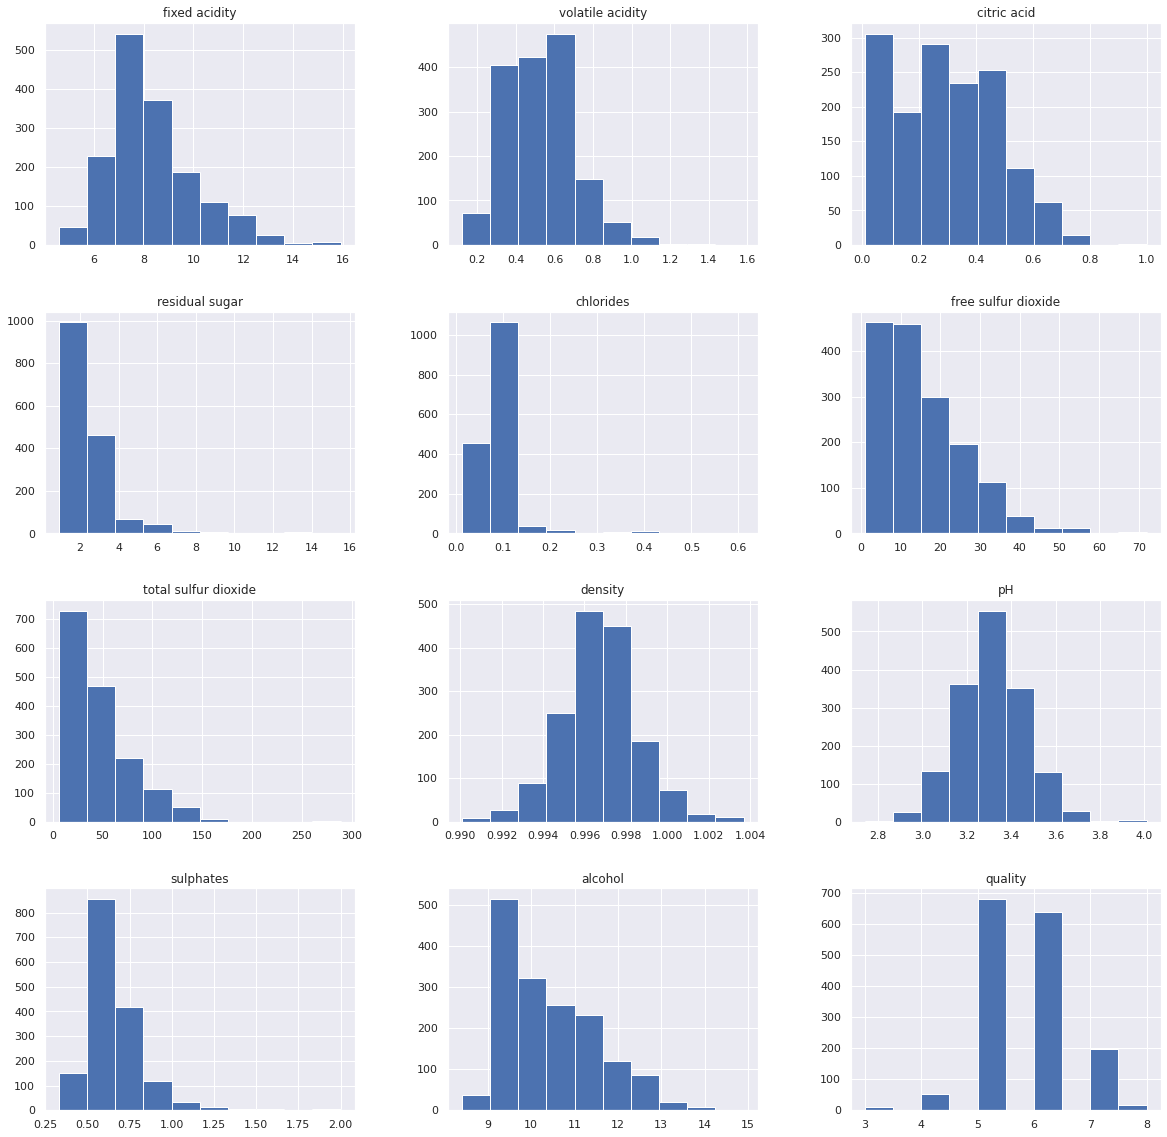

In [143]:
p=wine_copy.hist(figsize=(20,20))

In [144]:
wine_copy["citric acid"].fillna(wine_copy['citric acid'].mean(),inplace=True)

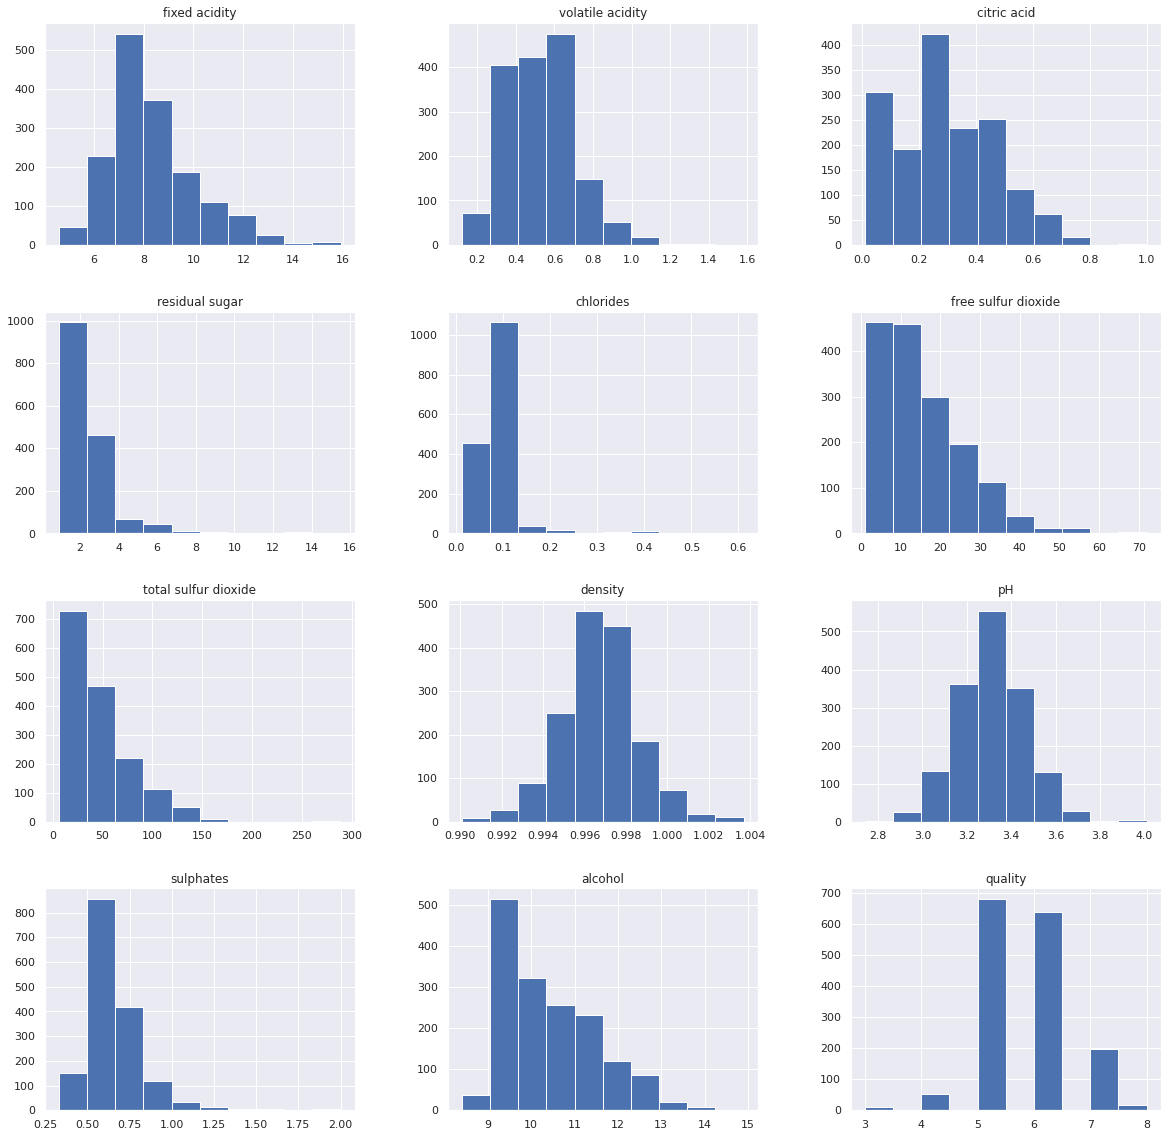

In [145]:
p=wine_copy.hist(figsize=(20,20))

In [146]:
wine.shape

(1599, 12)

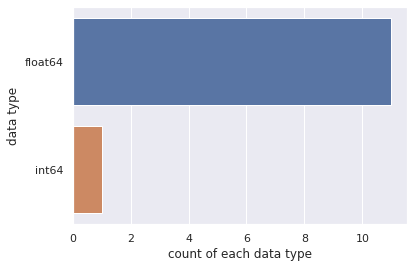

In [147]:
sns.countplot(y=wine.dtypes,data=wine)
plt.xlabel("count of each data type")
plt.ylabel("data type")
plt.show()

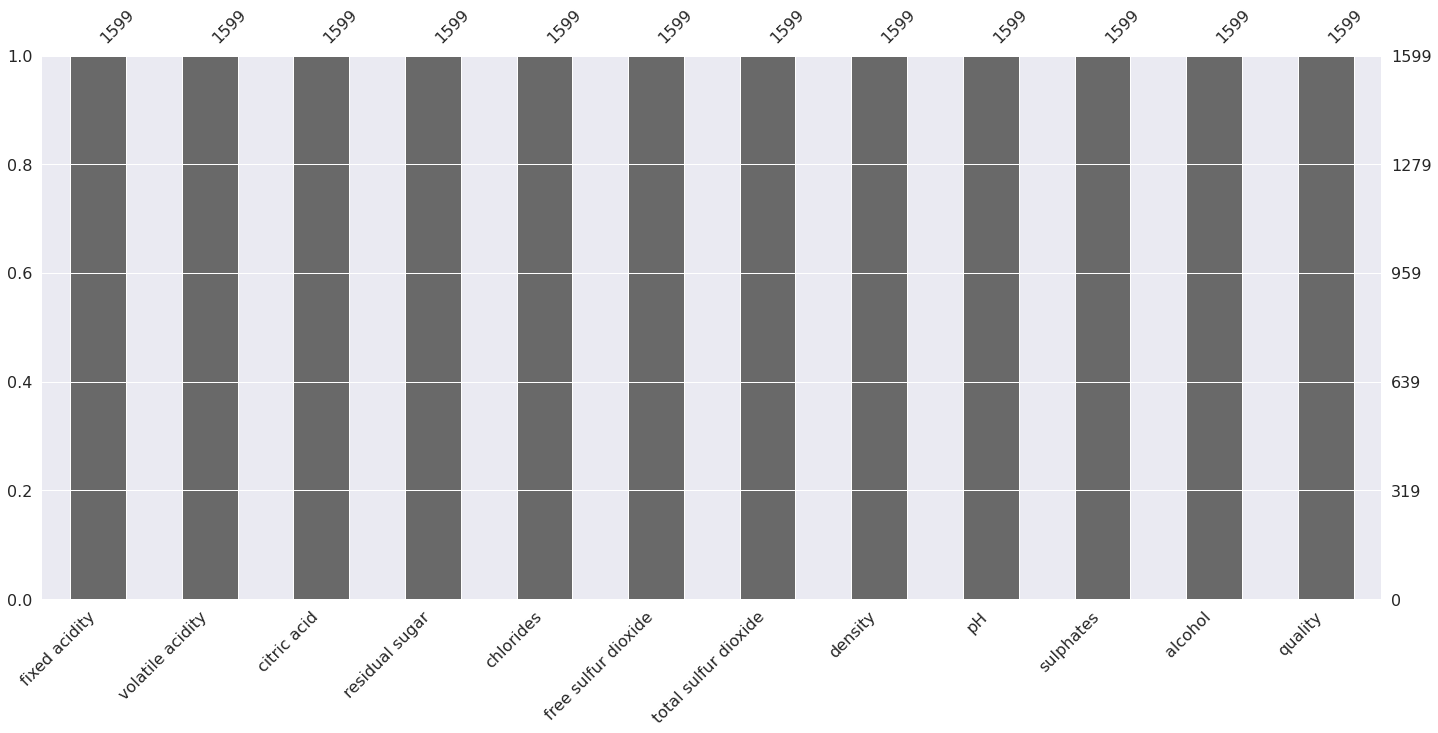

In [148]:
import missingno as msno
p=msno.bar(wine)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


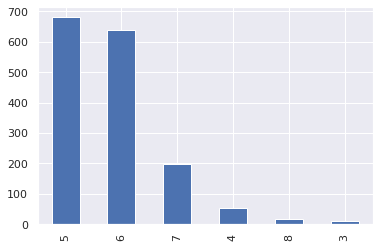

In [149]:
color_wheel={1:"#0392cf",2:"#7bc043"}
colors=wine["quality"].map(lambda x:color_wheel.get(x+1))
print(wine.quality.value_counts())
p=wine.quality.value_counts().plot(kind="bar")

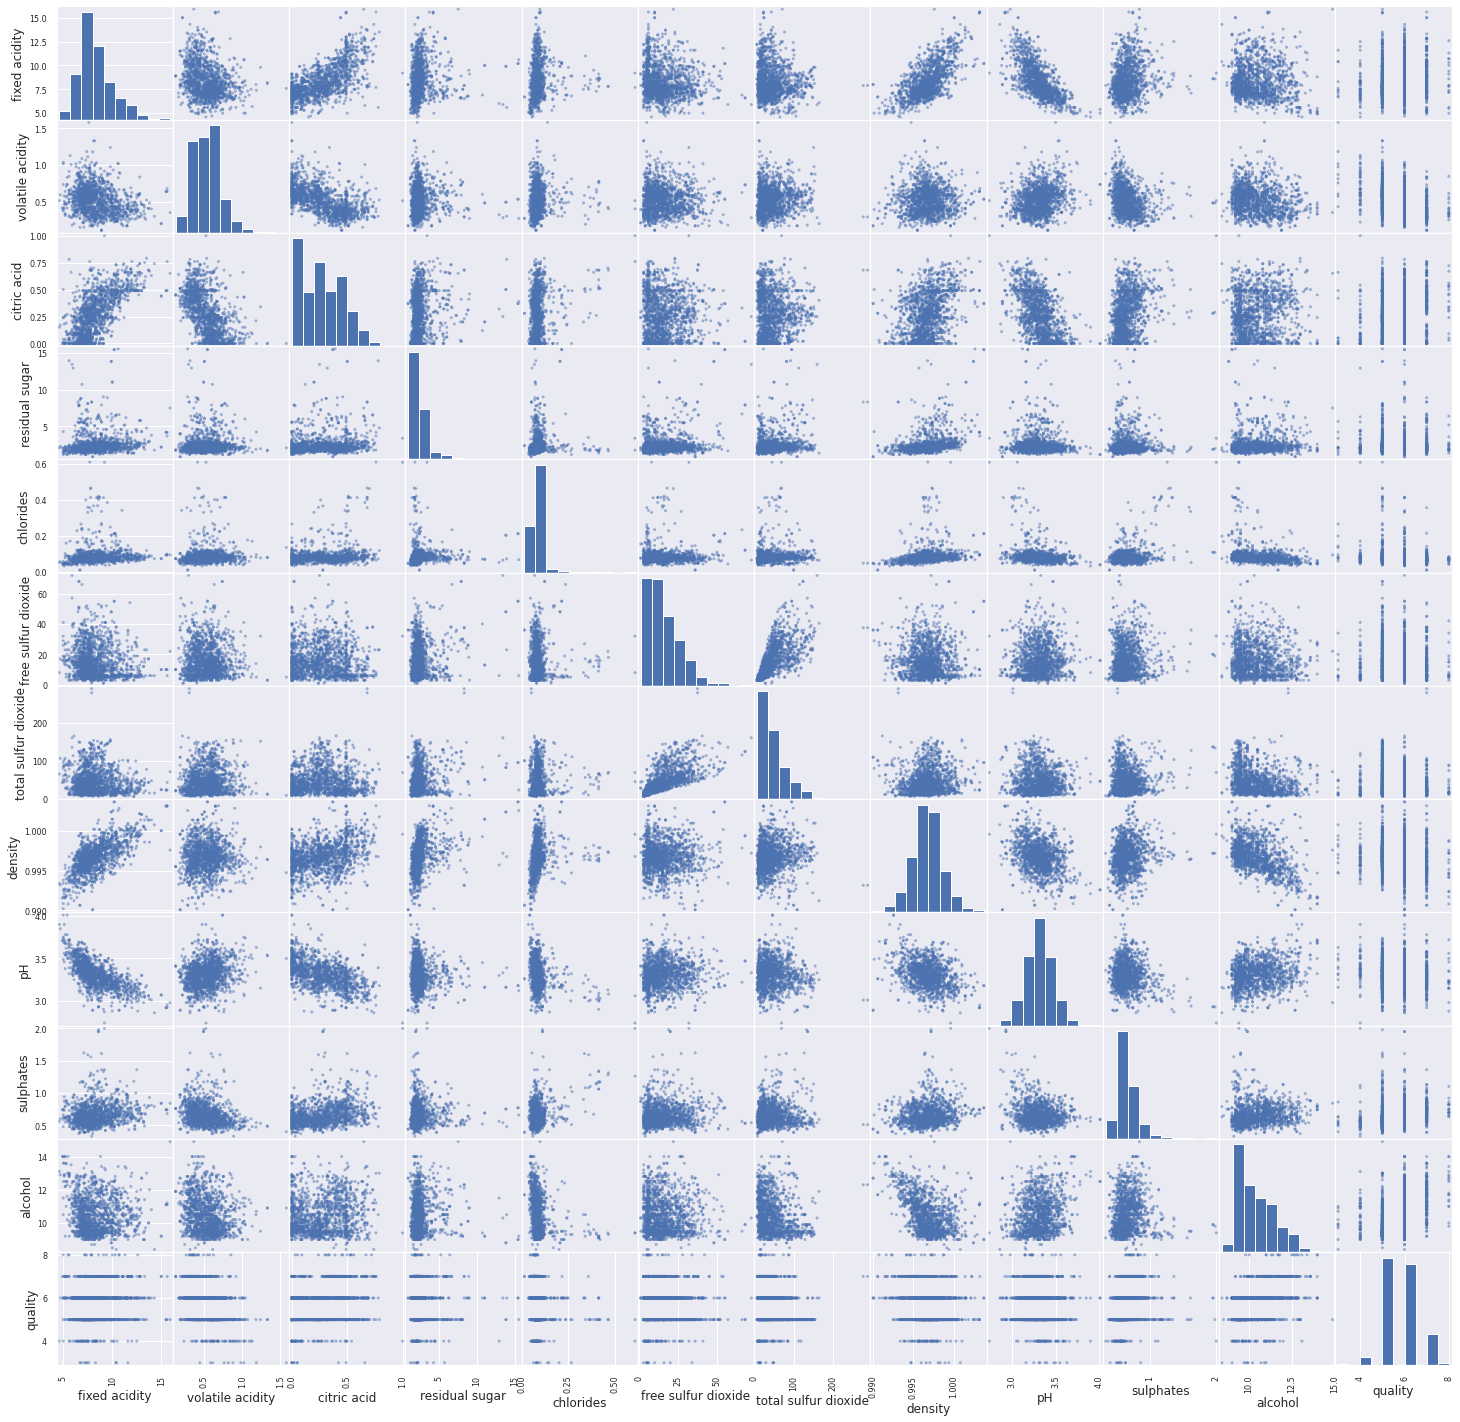

In [150]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(wine,figsize=(25,25))

# Pair Plot of Clean data

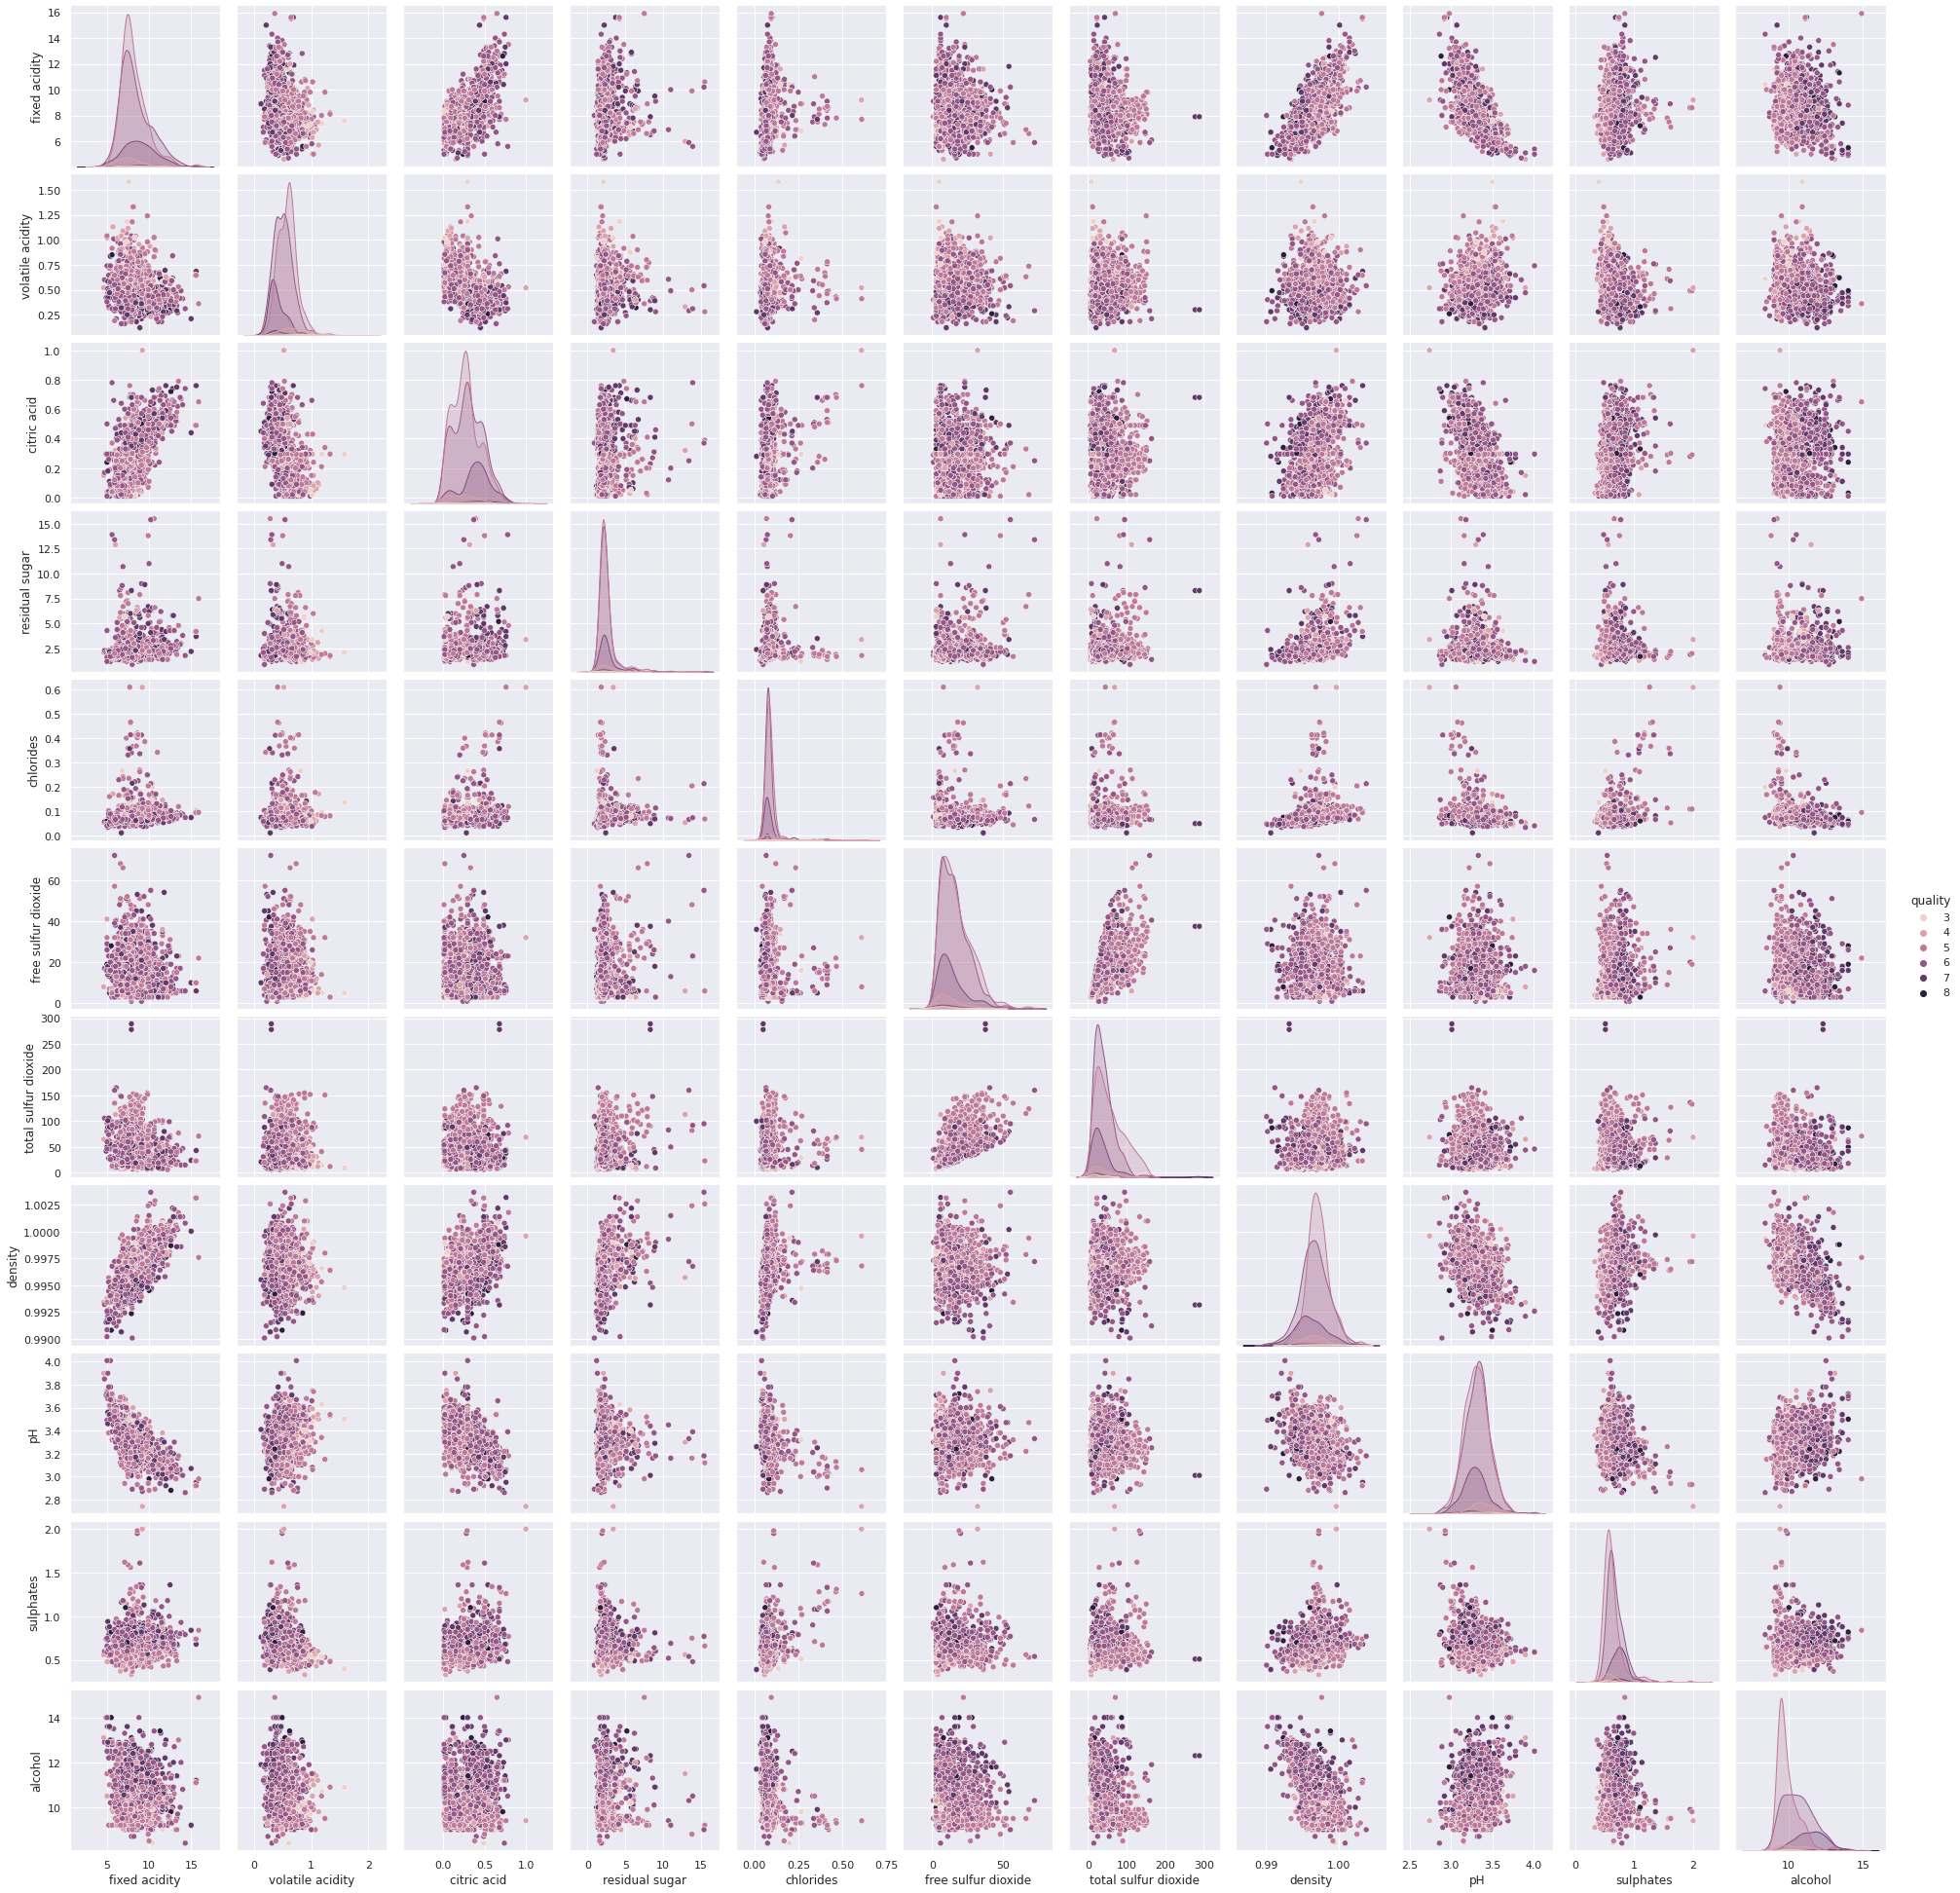

In [151]:
p=sns.pairplot(wine_copy,hue="quality")

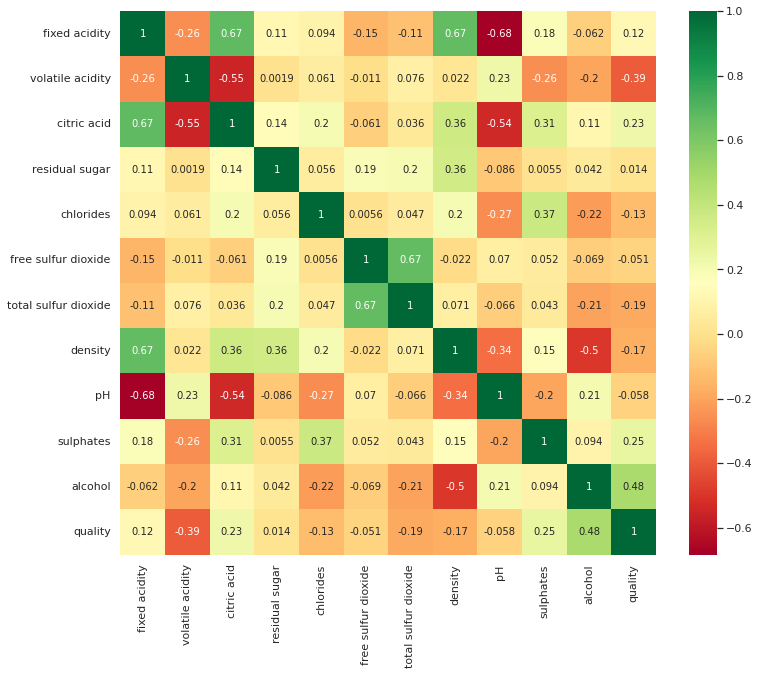

In [152]:
plt.figure(figsize=(12,10))
p=sns.heatmap(wine.corr(),annot=True,cmap="RdYlGn")

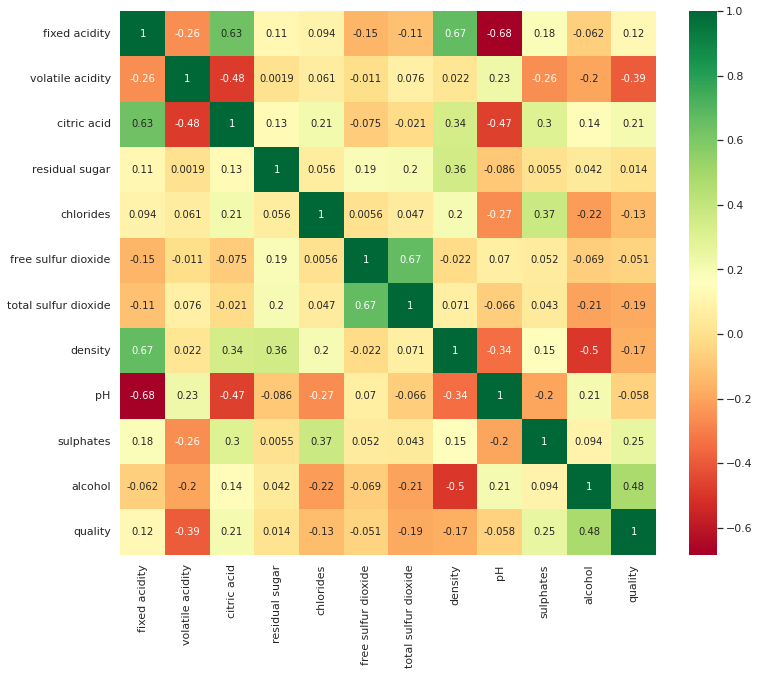

In [153]:
plt.figure(figsize=(12,10))
p=sns.heatmap(wine_copy.corr(),annot=True,cmap="RdYlGn")

In [154]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(wine_copy.drop(["quality"],axis=1),),columns=["fixed acidity","volatile acidity",
                                                                               "citric acid","residual sugar","chlorides",
                                                                               "free sulfur dioxide","total sulfur dioxide","density",
                                                                               "pH","sulphates","alcohol"])

In [155]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877     0.000000       -0.453218  -0.243707   
1      -0.298547          1.967442     0.000000        0.043416   0.223875   
2      -0.298547          1.297065    -1.442982       -0.169427   0.096353   
3       1.654856         -1.384443     1.495446       -0.453218  -0.264960   
4      -0.528360          0.961877     0.000000       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  
3 -0.584777  
4 -0.960246

In [156]:

wine_copy[["citric acid"]]=wine_copy[["citric acid"]].replace(0,np.NaN)
print(wine_copy.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [157]:
Y = wine_copy['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42,stratify=Y)

In [159]:
from sklearn.neighbors import KNeighborsClassifier
test=[]
train=[]
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    train.append(knn.score(X_train,Y_train))
    test.append(knn.score(X_test,Y_test))

In [160]:
max_train_score=max(train)
train_score_idx=[i for i, v in enumerate(train) if v == max_train_score]
print("Max train score {} % and k ={}".format(max_train_score*100,list(map(lambda x : x+1, train_score_idx))))

Max train score 100.0 % and k =[1]


In [161]:
max_test_score=max(test)
test_scores_idx=[i for i, v in enumerate(test) if v == max_test_score]
print("Max test score {} % and k={} ".format(max_test_score*100,list(map(lambda x:x+1,test_scores_idx))))

Max test score 90.5 % and k=[4] 


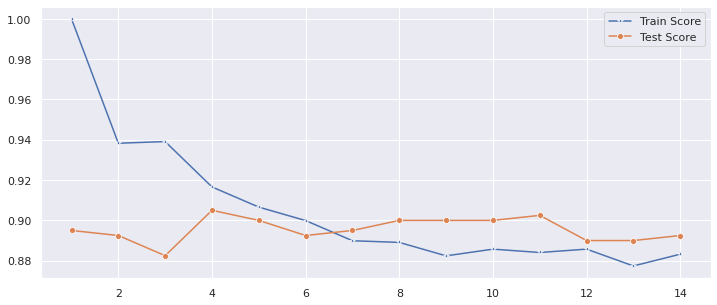

In [162]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,15),train,marker="*",label="Train Score")
p=sns.lineplot(range(1,15),test,marker="o",label="Test Score")

In [174]:
knn=KNeighborsClassifier(9)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.9

In [175]:
from sklearn.metrics import confusion_matrix
pred=knn.predict(X_test)
c=confusion_matrix(Y_test,pred)
pd.crosstab(Y_test,pred,rownames=["True"],colnames=["Predicted"],margins=True)

Predicted    0   1  All
True                   
0          336  10  346
1           30  24   54
All        366  34  400

Text(0.5, 12.5, 'Predicted label')

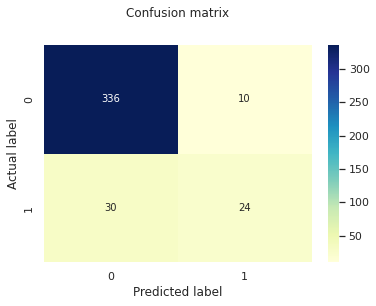

In [176]:
p = sns.heatmap(pd.DataFrame(c), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [177]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       346
           1       0.71      0.44      0.55        54

    accuracy                           0.90       400
   macro avg       0.81      0.71      0.74       400
weighted avg       0.89      0.90      0.89       400



In [178]:
from sklearn.metrics import roc_curve
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

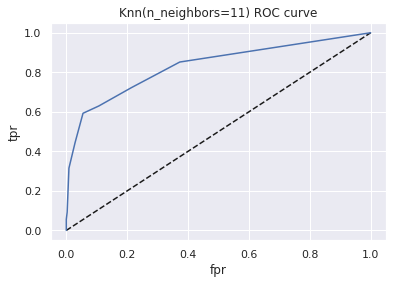

In [179]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [180]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred_prob)

0.8324502247912653

In [181]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.869917711598746
Best Parameters: {'n_neighbors': 44}
